# Cut Face sandstone tilt data compilation

This notebook is for compiling field data from summer fieldwork 2020 for the tilt corrections for Cut Face sandstone.

- The goal is to compile all tilt measurements from notebooks and Clino fieldmove data and come up with a mean tilt orientation for pmag analyses. 

In [1]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mplstereonet  # in PATH?

%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

## Cutface Creek sandstone

In [2]:
planes = pd.read_csv('../data/combinedplanes.csv')
planes = planes[[' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth', ' strike', ' unitId']]
planes.head(10)

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
0,48.054902,-90.518397,Igneous Foliation,17.503448,201.868240,111.868240,Poplar Lake Intrusion
1,48.054965,-90.518427,Igneous Foliation,15.905780,199.729507,109.729507,Poplar Lake Intrusion
2,48.054981,-90.518477,Igneous Foliation,9.542009,207.324341,117.324341,Poplar Lake Intrusion
3,48.055039,-90.518280,Igneous Foliation,14.075377,211.441071,121.441071,Poplar Lake Intrusion
4,48.055045,-90.518259,Igneous Foliation,17.607458,201.341568,111.341568,Poplar Lake Intrusion
5,48.054973,-90.518490,Igneous Foliation,24.022133,235.558762,145.558762,Poplar Lake Intrusion
6,48.054889,-90.518316,Igneous Foliation,17.817057,187.128128,97.128128,Poplar Lake Intrusion
7,48.054921,-90.518233,Igneous Foliation,15.986528,201.656677,111.656677,Poplar Lake Intrusion
8,48.054888,-90.518257,Igneous Foliation,17.125648,182.341888,92.341888,Poplar Lake Intrusion
9,48.054800,-90.518306,Igneous Foliation,16.229546,206.431290,116.431290,Poplar Lake Intrusion


In [3]:
planes.columns

Index([' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth',
       ' strike', ' unitId'],
      dtype='object')

In [4]:
# filter for the bedding measurements

CF_planes = planes[planes[' unitId'] == ' Cutface Creek sandstone']
CF_planes.head(10)

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
221,47.727571,-90.442533,Bedding,9.823921,146.686859,56.686859,Cutface Creek sandstone
222,47.727587,-90.442595,Bedding,11.817480,146.506927,56.506927,Cutface Creek sandstone
223,47.727582,-90.442594,Bedding,6.734155,177.580643,87.580643,Cutface Creek sandstone
224,47.727232,-90.442743,Bedding,10.030728,190.220154,100.220154,Cutface Creek sandstone
225,47.727479,-90.442674,Bedding,8.423083,169.595963,79.595963,Cutface Creek sandstone
226,47.727465,-90.442614,Bedding,11.170541,147.133591,57.133591,Cutface Creek sandstone
227,47.727631,-90.442684,Bedding,10.998850,146.835342,56.835342,Cutface Creek sandstone
228,47.727622,-90.442712,Bedding,11.661704,149.255753,59.255753,Cutface Creek sandstone
229,47.727825,-90.442720,Bedding,9.593727,170.141937,80.141937,Cutface Creek sandstone
230,47.727940,-90.442627,Bedding,7.917267,167.181808,77.181808,Cutface Creek sandstone


In [5]:
# filter for the bedding measurements
CF_Az_mean = CF_planes[' dipAzimuth'].mean()
CF_dip_mean = CF_planes[' dip'].mean()

In [6]:
print("Cutface average Dip Direction is " + str(CF_Az_mean) + " and average dip is " + str(CF_dip_mean)+ ".")

Cutface average Dip Direction is 170.9893703933334 and average dip is 10.974866506888889.


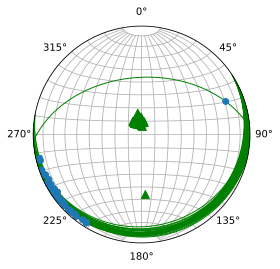

In [7]:
# plot the poles and planes for the bedding measurements
fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = CF_planes[' dipAzimuth']-90, CF_planes [' dip']
ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=8)
ax.rake(strike, dip, -25)
ax.grid()

plt.show()


## Terrace Point basalt 

In [8]:
TP_planes = planes[planes[' unitId'] == ' Terrace Point basalt']
TP_planes

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
271,47.726043,-90.443089,Joint,56.0,356.0,266.0,Terrace Point basalt
272,47.726038,-90.443093,Joint,79.0,80.0,350.0,Terrace Point basalt
273,47.726038,-90.443093,Joint,76.0,76.0,346.0,Terrace Point basalt
274,47.726020,-90.443070,Joint,61.0,338.0,248.0,Terrace Point basalt
275,47.726024,-90.443096,Joint,76.0,99.0,9.0,Terrace Point basalt
276,47.726024,-90.443094,Joint,58.0,334.0,244.0,Terrace Point basalt
277,47.726024,-90.443103,Joint,61.0,82.0,352.0,Terrace Point basalt
278,47.726028,-90.443098,Joint,84.0,284.0,194.0,Terrace Point basalt
279,47.726025,-90.443092,Joint,73.0,324.0,234.0,Terrace Point basalt
280,47.726012,-90.443072,Joint,78.0,92.0,2.0,Terrace Point basalt


In [9]:
TP_Az_mean = TP_planes[' dipAzimuth'].mean()
TP_dip_mean = TP_planes[' dip'].mean()

In [10]:
print("Terrace Point average Dip Direction is " + str(TP_Az_mean) + " and average dip is " + str(TP_dip_mean)+ ".")

Terrace Point average Dip Direction is 188.79245283018867 and average dip is 65.79245283018868.


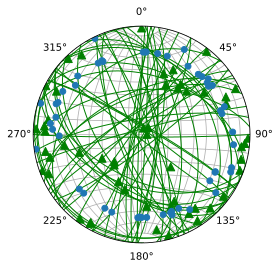

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = TP_planes[' dipAzimuth']-90, TP_planes [' dip']
ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=8)
ax.rake(strike, dip, -25)
ax.grid()

plt.show()

## Good Harbor Bay Andesite

In [12]:
GH_planes = planes[planes[' unitId'] == ' Good Harbor Bay andesite']
GH_planes

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
266,47.732921,-90.434242,Bedding,11.237436,198.650024,108.650024,Good Harbor Bay andesite
267,47.733024,-90.434286,Bedding,7.832314,208.016113,118.016113,Good Harbor Bay andesite
268,47.732932,-90.434256,Bedding,9.938019,198.938385,108.938385,Good Harbor Bay andesite
269,47.732984,-90.434102,Bedding,7.105858,203.816238,113.816238,Good Harbor Bay andesite
270,47.732972,-90.434145,Bedding,14.654791,156.971039,66.971039,Good Harbor Bay andesite
290,47.732916,-90.434298,Bedding,10.000000,177.000000,87.000000,Good Harbor Bay andesite
291,47.732916,-90.434288,Bedding,6.000000,164.000000,74.000000,Good Harbor Bay andesite
292,47.732917,-90.434270,Bedding,7.000000,191.000000,101.000000,Good Harbor Bay andesite
293,47.732919,-90.434274,Bedding,6.000000,215.000000,125.000000,Good Harbor Bay andesite
294,47.732940,-90.434259,Bedding,9.000000,217.000000,127.000000,Good Harbor Bay andesite


In [13]:
GH_Az_mean = GH_planes[' dipAzimuth'].mean()
GH_dip_mean = GH_planes[' dip'].mean()

In [14]:
print("Good Harbor average Dip Direction is " + str(GH_Az_mean) + " and average dip is " + str(GH_dip_mean)+ ".")

Good Harbor average Dip Direction is 183.95945332666668 and average dip is 9.717894553999999.


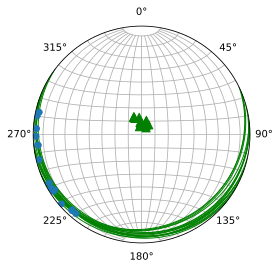

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = GH_planes[' dipAzimuth']-90, GH_planes [' dip']
ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=8)
ax.rake(strike, dip, -25)
ax.grid()

plt.show()